<a href="https://colab.research.google.com/github/jpdeleon/chronos/blob/master/notebooks/examples-triceratops.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import chronos as cr

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [2]:
# pip install git+https://github.com/stevengiacalone/triceratops.git#egg=triceratops

## choose target

In [3]:
tois = cr.get_tois()

In [4]:
#WASP in TOI comments
tois.loc[tois.Comments.str.contains("WASP").astype(bool),["TOI","Comments"]].dropna()

,TOI,Comments
0,101.01,WASP-46 b
1,102.01,WASP 62b
3,104.01,WASP-73
4,105.01,WASP-95
5,106.01,WASP-100b
...,...,...
1782,1809.01,WASP-56 b
1807,1833.01,WASP-54 b
1813,1838.01,WASP-92 b
1837,1862.01,CTOI from Ethan Kruse; WASP-150 b


## FPP calculation using short cadence lightcurve

In [5]:
sc = cr.ShortCadence(toiid=1725, calc_fpp=True)

Target: TOI 1725
Available sectors: [20]
Using sector=20.


In [6]:
#check triceratops init
sc.triceratops


Searching mast for TIC 86396382

1 tpf(s) found in sector(s) [20]
Using data from sector 20 only




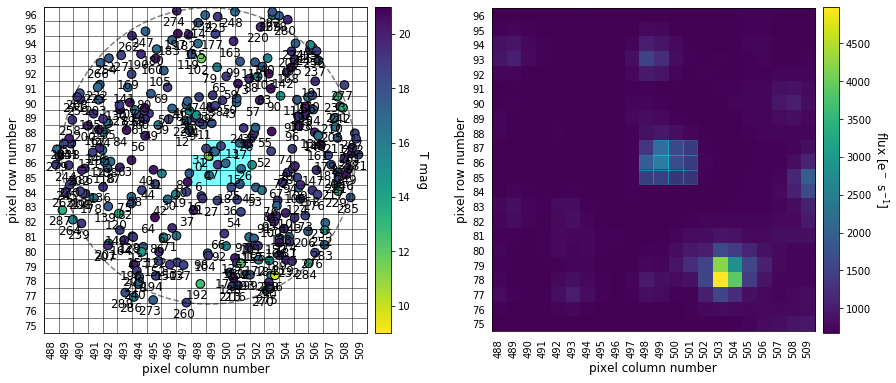

In [7]:
#download tpf from MAST via lightkurve 
tpf = sc.get_tpf()

#plot field
sc.plot_field()

## calculate NEB depths

In [12]:
sc.get_NEB_depths?

In [8]:
#depths based on dmag for all stars within encircled region
stars = sc.get_NEB_depths()
stars

,ID,Tmag,ra,dec,mass,rad,Teff,logg,lum,plx,Vmag,Kmag,fluxratio,tdepth
0,86396382,11.0967,97.636653,29.672296,1.17,1.749420,6154.00,4.02046,3.954701,2.312240,11.5690,10.188,9.511781e-01,0.01634
1,721606371,17.4914,97.638770,29.673856,NaN,NaN,NaN,NaN,NaN,-1.015030,NaN,NaN,2.591385e-03,0.00000
2,86396384,17.0451,97.639451,29.673724,NaN,NaN,NaN,NaN,NaN,NaN,18.2666,14.863,4.059251e-03,0.00000
3,86396386,18.4309,97.635554,29.675024,0.64,0.705881,4111.00,4.54678,0.128218,0.311328,19.8676,16.123,7.735688e-04,0.00000
4,721606363,19.0096,97.640627,29.668932,NaN,NaN,NaN,NaN,NaN,-0.762386,20.3447,NaN,8.102429e-04,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,86360042,15.9106,97.606222,29.622927,0.95,0.856950,5441.00,4.54988,0.579856,0.647406,16.7013,14.519,4.690686e-33,0.00000
287,86359996,13.3342,97.575078,29.655678,NaN,8.906480,4841.75,NaN,NaN,0.238461,14.4460,11.482,1.778450e-34,0.00000
288,721606312,18.0054,97.602503,29.624662,NaN,NaN,NaN,NaN,NaN,NaN,18.7739,NaN,3.699191e-34,0.00000
289,721606607,18.7839,97.571996,29.672179,0.69,0.625969,4431.00,4.68381,0.136084,-0.247960,20.0174,NaN,8.545776e-38,0.00000


## get shortcadence lightcurve

In [9]:
lc = sc.get_lc()

Searching lightcurvefile for TIC 86396382 (sector 20)
Found 1 lightcurves


In [10]:
flat, trend = sc.get_flat_lc(lc, return_trend=True)

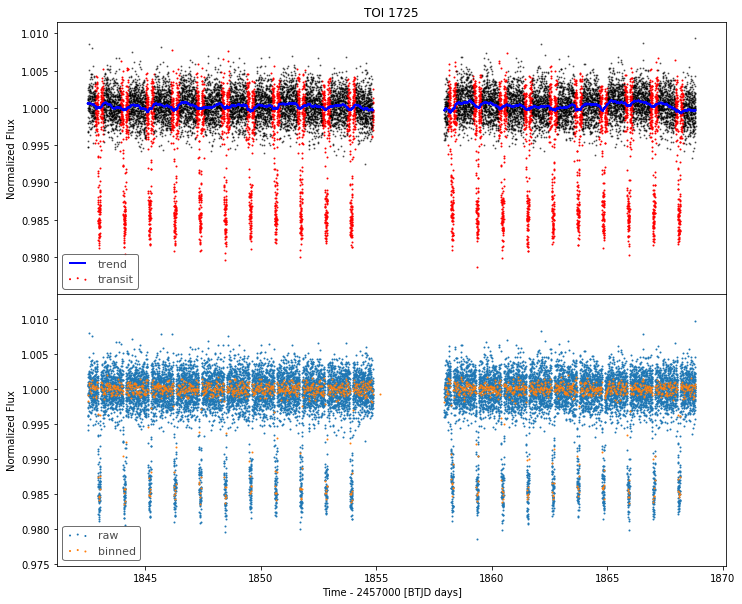

In [11]:
fig = sc.plot_trend_flat_lcs(lc)

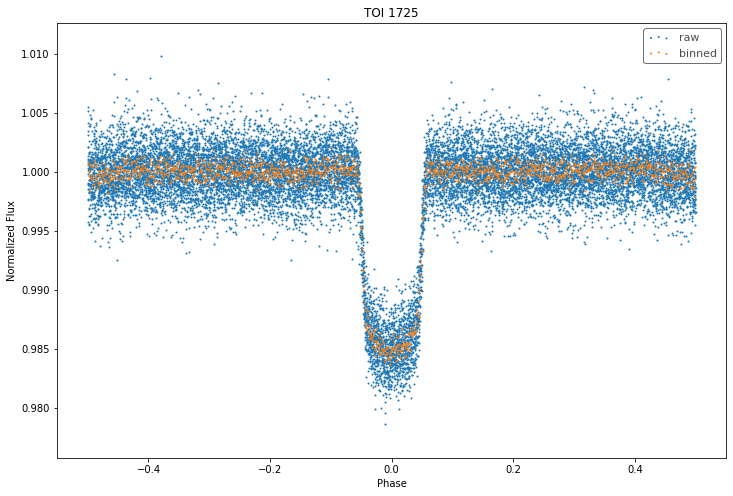

In [12]:
ax = sc.plot_fold_lc(flat)
# ax.set_xlim(-0.1,0.1)

In [11]:
sc.get_fpp?

ETA: 29.1 mins
TRILEGAL form submitted.
Calculating TTP and TEB scenario probabilities for 86396382.
Calculating PTP, PEB, STP, and SEB scenario probabilities for 86396382.
Calculating DTP, DEB, BTP, and BEB scenario probabilities for 86396382.
Run time: 4min 29sec
FPP=0.9886


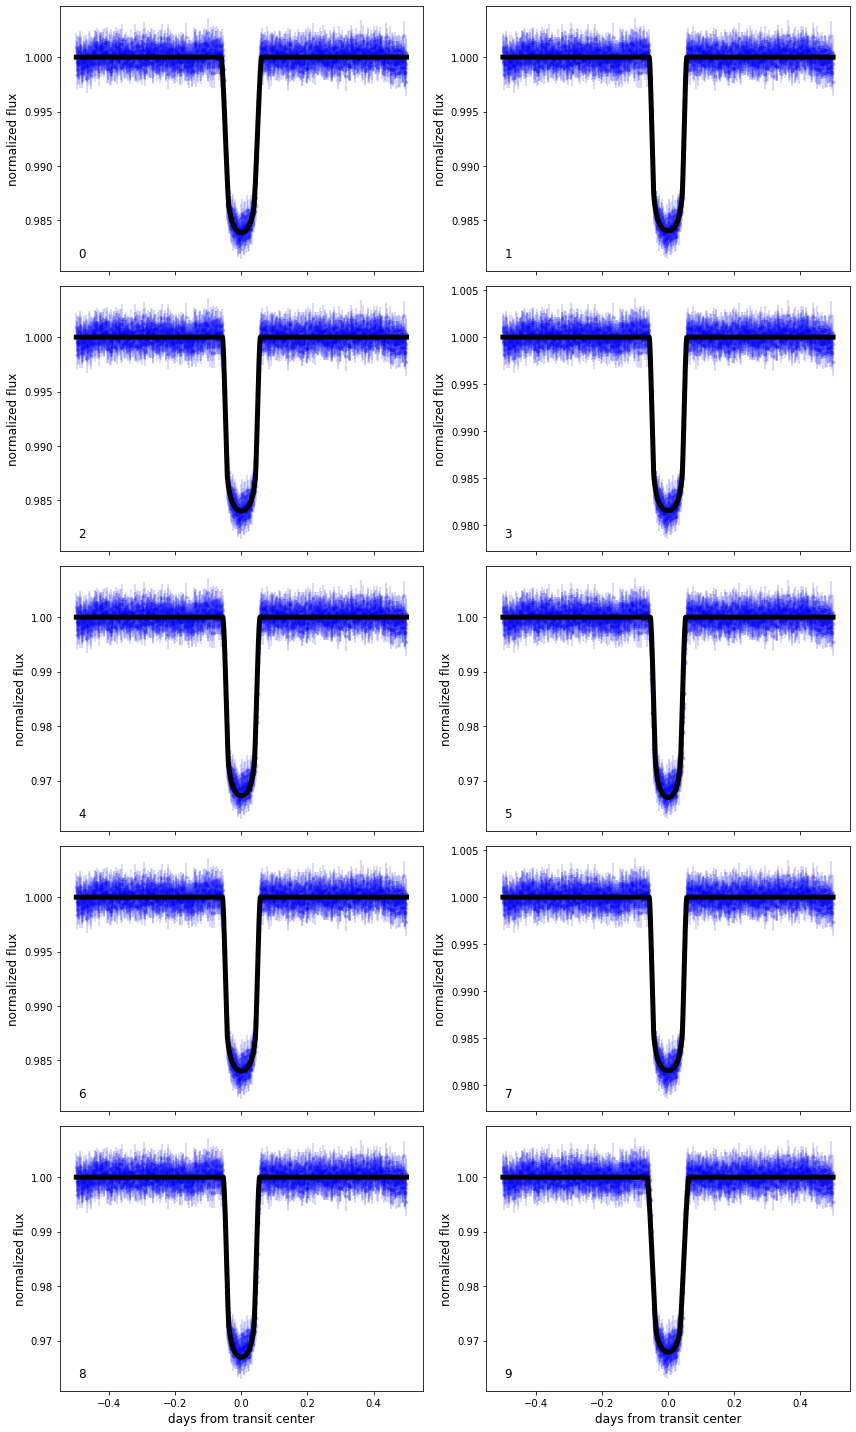

In [13]:
df = sc.get_fpp(flat=flat, bin=10, plot=True)

In [14]:
df

,ID,scenario,ms,rs,Teff,lum,fluxratio,Delta_mag,inc,rp,lnL,lnprior,prob
0,86396382,TTP,1.170000,1.749420,6154.0,3.954701,0.000000,-inf,75.541330,23.651012,-30.338893,-12.693496,4.363457e-15
1,86396382,TEB,1.374549,1.523452,6593.0,3.950786,0.000000,-inf,84.698461,0.181457,-0.018755,-10.405349,6.330373e-01
2,86396382,PTP,1.374549,1.523452,6593.0,3.950786,0.000631,8.0,82.973074,19.888968,-0.473081,-13.969851,1.137823e-02
3,86396382,PEB,1.320579,1.466694,6477.0,3.410896,0.136807,2.0,86.641839,0.187238,0.000000,-11.005930,3.537897e-01
4,86396382,STP,1.138994,1.266116,6082.0,1.976178,0.500000,0.0,89.999954,23.302809,-54.410908,-13.461251,7.113050e-26
5,86396382,SEB,1.138581,1.265629,6081.0,1.973362,0.500000,0.0,89.999764,0.214926,-206.662707,-11.201790,5.142936e-91
6,86396382,DTP,1.374549,1.523452,6593.0,3.950786,0.000631,8.0,82.973074,19.888968,-0.473081,-19.287704,5.579046e-05
7,86396382,DEB,1.320579,1.466694,6477.0,3.410896,0.136807,2.0,86.641839,0.187238,0.000000,-16.321362,1.738932e-03
8,86396382,BTP,1.106593,1.227137,6000.0,1.758267,0.500000,0.0,89.999981,22.686707,-109.395782,-18.735427,4.807099e-52
9,86396382,BEB,1.929861,2.044431,7999.0,15.416351,0.500000,0.0,77.932418,0.355754,-55.376680,-15.759311,2.720142e-27


## FPP calculation using long cadence lightcurve